# Классификация изображений Тома и Джерри

Ссылка на датасет - [Kaggle](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)

## Задача:
1. Обучть модель классифицировать изображения на два класса

![](https://storage.googleapis.com/kaggle-datasets-images/2136537/3554162/0473eccb7645c78ad29d97fcf69a3127/dataset-cover.jpg?t=2022-04-30-12-38-18)

## Используемые библиотеки

In [3]:
import os
import keras, shutil
import numpy as np
import pandas as pd
from keras import layers
from keras import Sequential
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Константы

In [4]:
BATCH_SIZE = 20
BASE_PATH = os.path.join(os.getcwd(), '..', '..', 'data', 'tom-and-jerry')
TRAIN_PATH = os.path.join(BASE_PATH, 'train')
VAL_PATH = os.path.join(BASE_PATH, 'val')
TEST_PATH = os.path.join(BASE_PATH, 'test')

## Загрузка данных


<span style="color:red">Добавить позже инстуркцию по загрузке данных</span>.

### Разделение данных

In [5]:
PARAMS = {
    'samples': [
        {
            'train': 700
        },
        {
            'val': 240
        },
        {
            'test': 240
        }
    ],
    'classes': ['tom', 'jerry']
}

In [6]:
print('Количество картинок с Томом: ', len(os.listdir(os.path.join(BASE_PATH, 'src', 'tom'))))
print('Количество картинок с Джерри', len(os.listdir(os.path.join(BASE_PATH, 'src', 'jerry'))))

Количество картинок с Томом:  1930
Количество картинок с Джерри 1240


In [7]:
for tag in PARAMS['classes']:
    paths = os.listdir(os.path.join(BASE_PATH, 'src', tag))

    for sample in PARAMS['samples']:
        name, count = list(sample.items())[0]

        shutil.rmtree(os.path.join(BASE_PATH, name, tag),  ignore_errors=True)
        os.makedirs(os.path.join(BASE_PATH, name, tag))

        for path in paths[:count]:
            shutil.copy(os.path.join(BASE_PATH, 'src', tag,  path), os.path.join(BASE_PATH, name, tag))
        
        paths = paths[count:]

### Создание ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
# test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_generator = train_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1400 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


## Конструирование сети

In [16]:
def create_model():
    model = Sequential()

    # Сверточная основа
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Полносвязный классификатор
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Настройка оптимизаторов и метрик
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
    
    return model

In [17]:
model = create_model()

In [10]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=120,
    steps_per_epoch=700 / BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=240 / BATCH_SIZE,
)

Epoch 1/120
35/35 [==============================] - 23s 642ms/step - loss: 0.7899 - acc: 0.5171 - val_loss: 0.6848 - val_acc: 0.5125
Epoch 2/120
35/35 [==============================] - 21s 611ms/step - loss: 0.6577 - acc: 0.6400 - val_loss: 0.6518 - val_acc: 0.6292
Epoch 3/120
35/35 [==============================] - 22s 613ms/step - loss: 0.5901 - acc: 0.7186 - val_loss: 0.5973 - val_acc: 0.7000
Epoch 4/120
35/35 [==============================] - 21s 609ms/step - loss: 0.5823 - acc: 0.7114 - val_loss: 0.6359 - val_acc: 0.6583
Epoch 5/120
35/35 [==============================] - 22s 623ms/step - loss: 0.5463 - acc: 0.7400 - val_loss: 0.5629 - val_acc: 0.7250
Epoch 6/120
35/35 [==============================] - 23s 642ms/step - loss: 0.5180 - acc: 0.7643 - val_loss: 0.4966 - val_acc: 0.7667
Epoch 7/120
35/35 [==============================] - 24s 680ms/step - loss: 0.4531 - acc: 0.7886 - val_loss: 0.4707 - val_acc: 0.7667
Epoch 8/120
35/35 [==============================] - 24s 687ms

In [11]:
model.save('tom-and-jerry.h5')

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [13]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_acc']

epochs = range(len(acc))

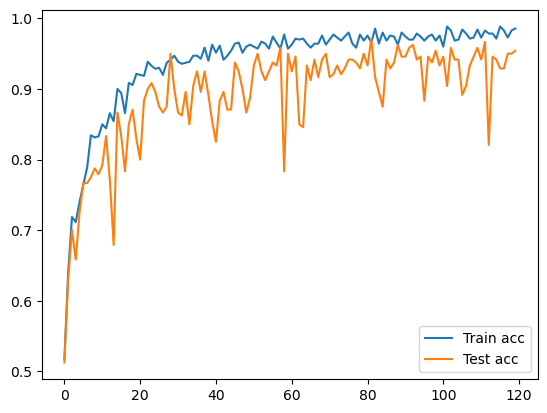

In [14]:
plt.plot(epochs, acc, label='Train acc')
plt.plot(epochs, val_acc, label='Test acc')
plt.legend()

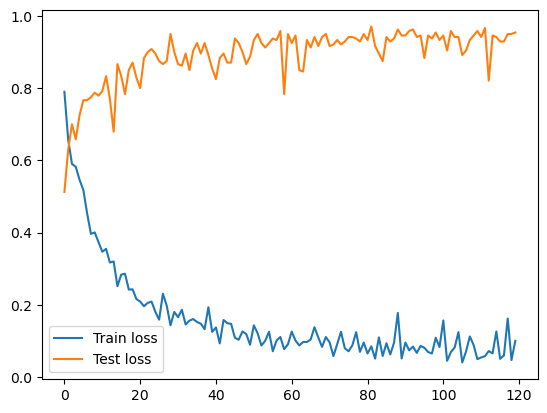

In [15]:
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Test loss')
plt.legend()

## Финальное обучение

In [22]:
model = create_model()

In [23]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=60,
    steps_per_epoch=700 / BATCH_SIZE
)

Epoch 1/60
35/35 [==============================] - 17s 471ms/step - loss: 0.7859 - acc: 0.5614
Epoch 2/60
35/35 [==============================] - 17s 479ms/step - loss: 0.6856 - acc: 0.5843
Epoch 3/60
35/35 [==============================] - 17s 488ms/step - loss: 0.6469 - acc: 0.6529
Epoch 4/60
35/35 [==============================] - 17s 491ms/step - loss: 0.5877 - acc: 0.6957
Epoch 5/60
35/35 [==============================] - 16s 455ms/step - loss: 0.5770 - acc: 0.7100
Epoch 6/60
35/35 [==============================] - 16s 444ms/step - loss: 0.5188 - acc: 0.7400
Epoch 7/60
35/35 [==============================] - 16s 439ms/step - loss: 0.5056 - acc: 0.7557
Epoch 8/60
35/35 [==============================] - 16s 444ms/step - loss: 0.4867 - acc: 0.7786
Epoch 9/60
35/35 [==============================] - 18s 510ms/step - loss: 0.4268 - acc: 0.8114
Epoch 10/60
35/35 [==============================] - 16s 462ms/step - loss: 0.4175 - acc: 0.8071
Epoch 11/60
35/35 [====================

In [ ]:
history1 = model.fit(
    val_generator,
    batch_size=BATCH_SIZE,
    epochs=60,
    steps_per_epoch=240 / BATCH_SIZE
)

Epoch 1/60
12/12 [==============================] - 7s 536ms/step - loss: 0.3575 - acc: 0.9042
Epoch 2/60
12/12 [==============================] - 6s 527ms/step - loss: 0.1330 - acc: 0.9667
Epoch 3/60
12/12 [==============================] - 6s 521ms/step - loss: 0.2041 - acc: 0.9167
Epoch 4/60
12/12 [==============================] - 6s 489ms/step - loss: 0.1601 - acc: 0.9417
Epoch 5/60
12/12 [==============================] - 6s 490ms/step - loss: 0.1608 - acc: 0.9542
Epoch 6/60
12/12 [==============================] - 6s 511ms/step - loss: 0.1099 - acc: 0.9500
Epoch 7/60
12/12 [==============================] - 6s 515ms/step - loss: 0.1743 - acc: 0.9333
Epoch 8/60
12/12 [==============================] - 6s 500ms/step - loss: 0.1303 - acc: 0.9667
Epoch 9/60
12/12 [==============================] - 6s 507ms/step - loss: 0.0842 - acc: 0.9667
Epoch 10/60
12/12 [==============================] - 7s 536ms/step - loss: 0.1325 - acc: 0.9458
Epoch 11/60
12/12 [==============================